In this tutorial, we will analyze Desmoid dataset from the [WORC Database](https://github.com/MStarmans91/WORCDatabase/tree/development).

The task is to correctly identify segmented lesions as either **desmoid-type fibromatosis** or **extremity soft-tissue sarcoma**.


More details on the dataset as well as the original analysis performed by their authors can be found here:

`Starmans, M. P. A. et al. (2021). The WORC* database: MRI and CT scans, segmentations, and clinical labels for 932 patients from six radiomics studies. Submitted, preprint available from https://doi.org/10.1101/2021.08.19.21262238`

`The experiments are described in the following paper: Starmans, M. P. A. et al. (2021). Reproducible radiomics through automated machine learning validated on twelve clinical applications. Submitted, preprint available from https://arxiv.org/abs/2108.08618.`

In [2]:
# In case you haven't installed AutoRadiomics
%pip install autorad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 2.2 MB/s eta 0:00:00
  Using cached databricks_cli-0.16.2-py3-none-any.whl
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached itsdangerous-2.0.1-py3-none-any.whl (18 kB)
  Using cached Pillow-9.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached colorlog-6.6.0-py2.py3-none-any.whl (11 kB)
  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Using cached pandas-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached SimpleITK-2.1.1.2-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (48.4 MB)
  Using cached PyWavelets-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.9 MB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached ruamel.yaml.clib-0.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (519 kB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_

In [3]:
import pandas as pd
from pathlib import Path
from autorad.external.download_WORC import download_WORCDatabase

# Set where we will save our data and results
base_dir = Path.cwd() / "autorad_tutorial"
data_dir = base_dir / "data"
result_dir = base_dir / "results"
data_dir.mkdir(exist_ok=True, parents=True)
result_dir.mkdir(exist_ok=True, parents=True)

%load_ext autoreload
%autoreload 2

In [ ]:
# download data (it may take a few minutes)
download_WORCDatabase(
    dataset="Desmoid",
    data_folder=data_dir,
    n_subjects=100,
    )

In [5]:
!ls $data_dir

Desmoid-004  Desmoid-038  Desmoid-082  Desmoid-111  Desmoid-147  Desmoid-177
Desmoid-006  Desmoid-039  Desmoid-084  Desmoid-112  Desmoid-150  Desmoid-179
Desmoid-009  Desmoid-040  Desmoid-088  Desmoid-113  Desmoid-152  Desmoid-180
Desmoid-011  Desmoid-043  Desmoid-091  Desmoid-114  Desmoid-153  Desmoid-182
Desmoid-014  Desmoid-046  Desmoid-093  Desmoid-115  Desmoid-154  Desmoid-183
Desmoid-016  Desmoid-054  Desmoid-095  Desmoid-116  Desmoid-159  Desmoid-184
Desmoid-017  Desmoid-055  Desmoid-096  Desmoid-119  Desmoid-162  Desmoid-185
Desmoid-021  Desmoid-056  Desmoid-098  Desmoid-121  Desmoid-163  Desmoid-189
Desmoid-022  Desmoid-059  Desmoid-100  Desmoid-122  Desmoid-165  Desmoid-190
Desmoid-023  Desmoid-060  Desmoid-101  Desmoid-126  Desmoid-166  Desmoid-193
Desmoid-024  Desmoid-062  Desmoid-102  Desmoid-128  Desmoid-169  Desmoid-194
Desmoid-025  Desmoid-068  Desmoid-103  Desmoid-129  Desmoid-170  Desmoid-195
Desmoid-026  Desmoid-071  Desmoid-104  Desmoid-130  Desmoid-171  Desmoid-198

In [6]:
from autorad.utils.preprocessing import get_paths_with_separate_folder_per_case

# create a table with all the paths
paths_df = get_paths_with_separate_folder_per_case(data_dir, relative=True)
paths_df.sample(5)

,ID,image_path,segmentation_path
25,Desmoid-179,Desmoid-179/image.nii.gz,Desmoid-179/segmentation.nii.gz
67,Desmoid-165,Desmoid-165/image.nii.gz,Desmoid-165/segmentation.nii.gz
12,Desmoid-017,Desmoid-017/image.nii.gz,Desmoid-017/segmentation.nii.gz
31,Desmoid-023,Desmoid-023/image.nii.gz,Desmoid-023/segmentation.nii.gz
29,Desmoid-095,Desmoid-095/image.nii.gz,Desmoid-095/segmentation.nii.gz


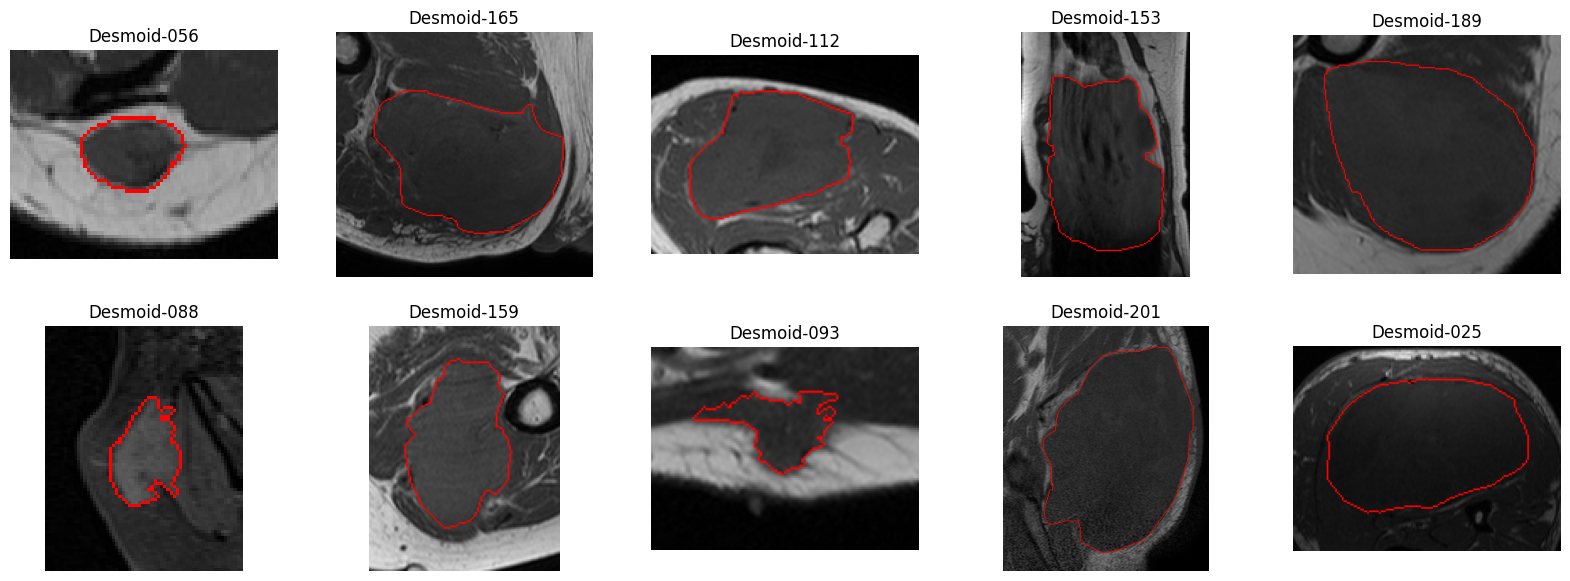

In [7]:
from autorad.data.dataset import ImageDataset
from autorad.feature_extraction.extractor import FeatureExtractor
import logging

logging.getLogger().setLevel(logging.CRITICAL)

image_dataset = ImageDataset(
    paths_df,
    ID_colname="ID",
    root_dir=data_dir,
)

# Let's take a look at the data, plotting random 10 cases
image_dataset.plot_examples(n=10, window=None)

In [8]:
extractor = FeatureExtractor(image_dataset, extraction_params="MR_default.yaml")
feature_df = extractor.run()

100it [01:04,  1.54it/s]


In [9]:
feature_df.head()

,ID,image_path,segmentation_path,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,Desmoid-101,/home/pw-research/git/autorad-nb-fix/examples/...,/home/pw-research/git/autorad-nb-fix/examples/...,0.734207,0.643212,16.489190,25.635685,35.377429,24.648783,28.284271,...,0.006654,0.006529,0.896040,20192.509901,0.006498,0.003122,0.022552,275191.468879,10.934496,448.947192
1,Desmoid-122,/home/pw-research/git/autorad-nb-fix/examples/...,/home/pw-research/git/autorad-nb-fix/examples/...,0.760332,0.580826,38.768917,66.747900,90.708307,79.603000,58.137767,...,0.062702,0.004573,0.247710,147.106873,0.001611,0.227859,0.002077,6580.736863,0.041621,11.206509
2,Desmoid-128,/home/pw-research/git/autorad-nb-fix/examples/...,/home/pw-research/git/autorad-nb-fix/examples/...,0.475148,0.152487,9.391069,61.585961,59.558515,56.135699,32.557641,...,0.019349,0.006281,0.668985,1048.330026,0.004846,0.043661,0.013789,26591.775754,0.995830,42.982432
3,Desmoid-014,/home/pw-research/git/autorad-nb-fix/examples/...,/home/pw-research/git/autorad-nb-fix/examples/...,0.373535,0.000000,0.000000,37.633214,16.000000,30.000000,36.769553,...,0.021321,0.020898,0.859410,6091.298186,0.020801,0.003684,0.067308,21498.717927,4.102798,347.542798
4,Desmoid-074,/home/pw-research/git/autorad-nb-fix/examples/...,/home/pw-research/git/autorad-nb-fix/examples/...,0.873614,0.718321,77.484876,107.869387,125.299641,123.547562,115.741090,...,0.093642,0.002011,0.160422,154.590314,0.000404,0.748296,0.000444,5875.243768,0.024981,2.365077


In [10]:
label_df = pd.read_csv(data_dir / "labels.csv")
label_df.sample(5)

,patient_ID,diagnosis
45,Desmoid-129,1
52,Desmoid-180,1
19,Desmoid-076,1
80,Desmoid-170,0
58,Desmoid-172,1


In [11]:
from autorad.data.dataset import FeatureDataset

merged_feature_df = feature_df.merge(label_df, left_on="ID",
    right_on="patient_ID", how="left")
feature_dataset = FeatureDataset(
    merged_feature_df,
    target="diagnosis",
    ID_colname="ID"
)

Split the data into training/validation/test sets with stratification:

In [12]:
splits_path = result_dir / "splits.json"
feature_dataset.split(method="train_val_test", save_path=splits_path)

{'split_type': 'stratified split: 60% train + 20% validation + 20% test',
 'train': ['Desmoid-177',
  'Desmoid-004',
  'Desmoid-179',
  'Desmoid-030',
  'Desmoid-023',
  'Desmoid-084',
  'Desmoid-165',
  'Desmoid-043',
  'Desmoid-115',
  'Desmoid-017',
  'Desmoid-183',
  'Desmoid-195',
  'Desmoid-169',
  'Desmoid-102',
  'Desmoid-113',
  'Desmoid-074',
  'Desmoid-055',
  'Desmoid-107',
  'Desmoid-103',
  'Desmoid-193',
  'Desmoid-068',
  'Desmoid-025',
  'Desmoid-152',
  'Desmoid-170',
  'Desmoid-199',
  'Desmoid-166',
  'Desmoid-022',
  'Desmoid-082',
  'Desmoid-056',
  'Desmoid-076',
  'Desmoid-201',
  'Desmoid-162',
  'Desmoid-093',
  'Desmoid-112',
  'Desmoid-108',
  'Desmoid-134',
  'Desmoid-026',
  'Desmoid-128',
  'Desmoid-024',
  'Desmoid-062',
  'Desmoid-171',
  'Desmoid-141',
  'Desmoid-175',
  'Desmoid-185',
  'Desmoid-173',
  'Desmoid-147',
  'Desmoid-095',
  'Desmoid-182',
  'Desmoid-060',
  'Desmoid-059',
  'Desmoid-110',
  'Desmoid-159',
  'Desmoid-037',
  'Desmoid-153',

In [13]:
from autorad.models.classifier import MLClassifier
from autorad.training.trainer import Trainer

models = MLClassifier.initialize_default_sklearn_models()
print(models)

[Random Forest, Logistic Regression, SVM, XGBoost]


In [14]:
trainer = Trainer(
    dataset=feature_dataset,
    models=models,
    result_dir=result_dir,
    experiment_name="Fibromatosis_vs_sarcoma_classification",
)
trainer.run_auto_preprocessing(
        selection_methods= ["boruta"],
        oversampling=False,
        )

In [15]:
trainer.set_optimizer("optuna", n_trials=30)
trainer.run(auto_preprocess=True)

[I 2022-08-26 18:28:54,256] A new study created in memory with name: Fibromatosis_vs_sarcoma_classification
[I 2022-08-26 18:28:54,619] Trial 0 finished with value: 0.7032967032967034 and parameters: {'feature_selection_method': 'boruta', 'oversampling_method': None, 'model': 'Random Forest', 'rf_n_estimators': 734, 'rf_max_depth': 22, 'rf_max_features': 'auto', 'rf_min_samples_leaf': 5, 'rf_min_samples_split': 5, 'rf_bootstrap': False}. Best is trial 0 with value: 0.7032967032967034.
2022/08/26 18:28:54 INFO mlflow.tracking.fluent: Experiment with name 'Fibromatosis_vs_sarcoma_classification' does not exist. Creating a new experiment.
[I 2022-08-26 18:28:54,816] Trial 1 finished with value: 0.6923076923076923 and parameters: {'feature_selection_method': 'boruta', 'oversampling_method': None, 'model': 'XGBoost', 'xgb_lambda': 4.3896063362849525e-07, 'xgb_alpha': 3.793724640322306e-07, 'colsample_bytree': 0.6252410990734707, 'xgb_subsample': 0.6254620696774928, 'xgb_booster': 'gblinear'

In [16]:
from autorad.utils import io
from autorad.visualization import plotly_utils
from autorad.training.infer import Inferrer

best_params = io.load_json(result_dir / "best_params.json")
inferrer = Inferrer(params=best_params, result_dir=result_dir)
inferrer.fit_eval(feature_dataset, result_name="test")

results = pd.read_csv(result_dir / "test.csv")
plotly_utils.plot_roc_curve(results.y_true, results.y_pred_proba)

In [17]:
results

,y_true,y_pred_proba
0,1,0.959119
1,1,1.000000
2,1,0.947170
3,1,0.542228
4,1,0.981132
5,1,0.279874
6,1,0.897484
7,1,0.578077
8,1,0.959119
9,1,0.443890
